In [2]:
import pandas as pd
killings = pd.read_csv('/Users/Wong/GA/SF_DAT_15_WORK/hw/police-killings.csv')

In [3]:
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

In [4]:
killings.columns #want to check columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day', u'year', u'streetaddress', u'city', u'state', u'agency', u'cause', u'armed', u'county_income'], dtype='object')

In [5]:
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [6]:
type(killings.year)

pandas.core.series.Series

In [7]:
killings.shape

(467, 15)

In [8]:
killings.isnull().sum() #need to take out shape and case sensitive

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [9]:
killings.streetaddress.fillna(value='Unknown', inplace=True)

In [10]:
killings[killings.year==2015].shape[0]
#int or string
killings.dtypes

Unnamed: 0        int64
name             object
age               int64
gender           object
race             object
month            object
day               int64
year              int64
streetaddress    object
city             object
state            object
agency           object
cause            object
armed            object
county_income     int64
dtype: object

In [11]:
killings.gender.value_counts()

Male      445
Female     22
dtype: int64

In [12]:
killings.shape
#row, column
1 / 2.0

0.5

In [13]:
killings[killings.armed == 'No'].shape[0]

102

In [14]:
print killings[killings.armed == 'No'].shape[0]
print killings.shape[0]

print float(102)/467

killings.armed.value_counts()/killings.shape[0]

102
467
0.218415417559


Firearm               0.492505
No                    0.218415
Knife                 0.145610
Other                 0.055675
Vehicle               0.038544
Non-lethal firearm    0.029979
Unknown               0.014989
Disputed              0.004283
dtype: float64

In [15]:
killings.groupby('state').state.count()
#state is only to see the state column
killings.state.value_counts().head(5)
#sorts

CA    74
TX    46
FL    29
AZ    25
OK    22
dtype: int64

In [16]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

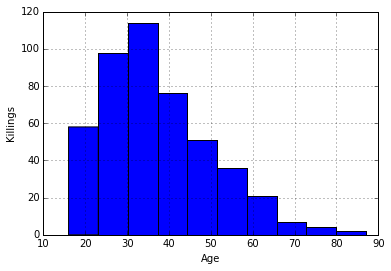

In [17]:
%matplotlib inline  
killings.age.hist()
import matplotlib.pyplot as plt
plt.xlabel('Age')
plt.ylabel('Killings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a13dfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a4a5ad0>]], dtype=object)

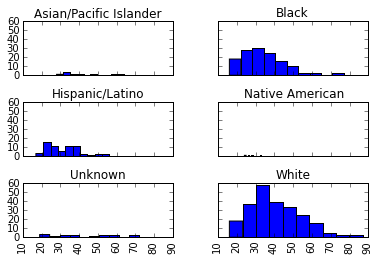

In [18]:
#killings.age.hist(by=killings.race)
killings.age.hist(by=killings.race, sharex=True, sharey=True)

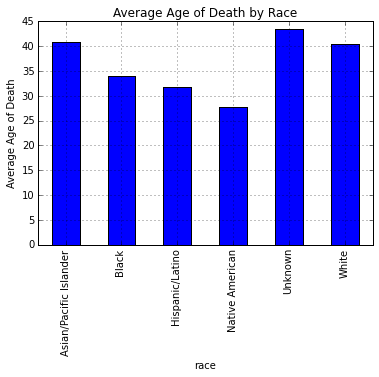

In [19]:
killings.groupby('race').age.mean().plot(kind='bar')
plt.ylabel('Average Age of Death')
plt.title('Average Age of Death by Race')

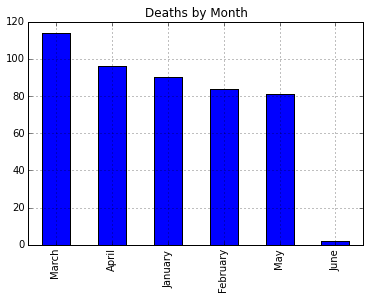

In [20]:
killings.month.value_counts().plot(kind='bar', title='Deaths by Month')
#value_counts is always by month

In [21]:
majors = pd.read_csv('/Users/Wong/GA/SF_DAT_15/hw/data/college-majors.csv')

In [22]:
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [23]:
majors.Major.value_counts()

AEROSPACE ENGINEERING                                           1
FOOD SCIENCE                                                    1
COMMUNICATION TECHNOLOGIES                                      1
MECHANICAL ENGINEERING RELATED TECHNOLOGIES                     1
MASS MEDIA                                                      1
AGRICULTURE PRODUCTION AND MANAGEMENT                           1
ART AND MUSIC EDUCATION                                         1
PLANT SCIENCE AND AGRONOMY                                      1
SECONDARY TEACHER EDUCATION                                     1
MISCELLANEOUS SOCIAL SCIENCES                                   1
VISUAL AND PERFORMING ARTS                                      1
GENERAL MEDICAL AND HEALTH SERVICES                             1
ASTRONOMY AND ASTROPHYSICS                                      1
FRENCH GERMAN LATIN AND OTHER COMMON FOREIGN LANGUAGE STUDIES    1
MISCELLANEOUS ENGINEERING TECHNOLOGIES                          1
...
CHEMI

In [24]:
majors.sort('Median', ascending=False).head(10)[['Major','Median']]

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


In [25]:
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [26]:
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [27]:
majors.Major.value_counts()

AEROSPACE ENGINEERING                                           1
FOOD SCIENCE                                                    1
COMMUNICATION TECHNOLOGIES                                      1
MECHANICAL ENGINEERING RELATED TECHNOLOGIES                     1
MASS MEDIA                                                      1
AGRICULTURE PRODUCTION AND MANAGEMENT                           1
ART AND MUSIC EDUCATION                                         1
PLANT SCIENCE AND AGRONOMY                                      1
SECONDARY TEACHER EDUCATION                                     1
MISCELLANEOUS SOCIAL SCIENCES                                   1
VISUAL AND PERFORMING ARTS                                      1
GENERAL MEDICAL AND HEALTH SERVICES                             1
ASTRONOMY AND ASTROPHYSICS                                      1
FRENCH GERMAN LATIN AND OTHER COMMON FOREIGN LANGUAGE STUDIES    1
MISCELLANEOUS ENGINEERING TECHNOLOGIES                          1
...
CHEMI

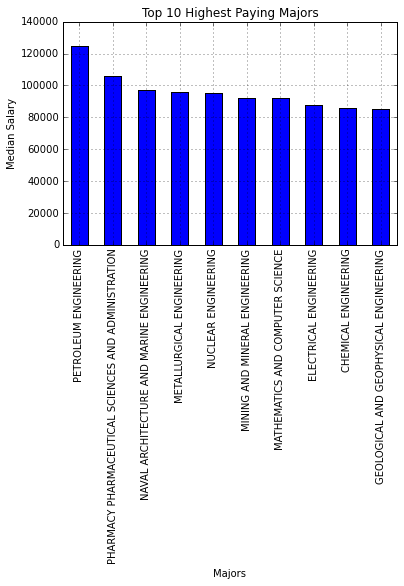

In [28]:
majors.sort('Median', ascending=False).head(10)[['Major','Median']].plot(x='Major',y='Median', kind='bar', title='Top 10 Highest Paying Majors')
plt.xlabel('Majors')
plt.ylabel('Median Salary')
plt.show()

In [29]:
majors.sort('Median', ascending=False).head(10)[['Major_category','Median']]

,Major_category,Median
59,Engineering,125000
154,Health,106000
57,Engineering,97000
55,Engineering,96000
58,Engineering,95000
56,Engineering,92000
97,Computers & Mathematics,92000
48,Engineering,88000
45,Engineering,86000
51,Engineering,85000


In [30]:
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

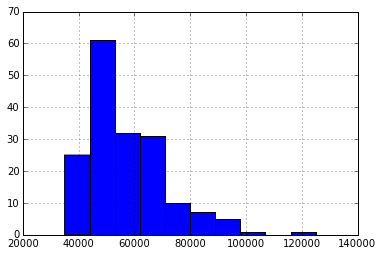

In [31]:
majors.Median.hist()

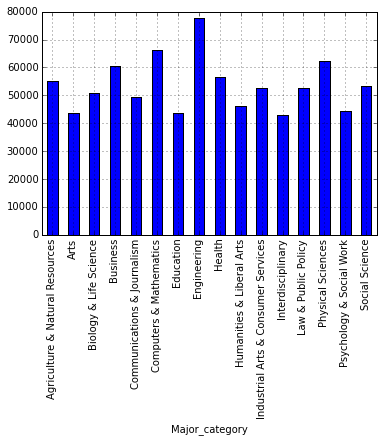

In [34]:
# 8. Plot a histogram of the distribution of median salaries by major category

majors.groupby('Major_category').Median.mean().plot(kind='bar')